In [1]:
import numpy as np
from imageio import imread
from skimage.transform import resize
from keras import Model
from keras.layers import Dense
import os
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import confusion_matrix
from keras.applications.inception_resnet_v2 import InceptionResNetV2 , preprocess_input
from keras.optimizers import Adam,SGD,RMSprop,Adadelta

In [2]:
path= "/content/drive/MyDrive/Colab Notebooks/yeni/data"


X_data = []
y_data = []
for subdir, dirs, files in os.walk(path):
   print(subdir)
   for file in files:
        pic = cv2.imread(os.path.join(subdir, file))
        pic = preprocess_input(pic)
        pic = resize(pic, (96, 96,3))
        
        X_data.append(pic)
        y_data.append(int(subdir[-1]))



X = np.array(X_data)
y = np.array(y_data)

print(X.shape)
print(y.shape)


/content/drive/MyDrive/Colab Notebooks/yeni/data
/content/drive/MyDrive/Colab Notebooks/yeni/data/0
/content/drive/MyDrive/Colab Notebooks/yeni/data/1
(3000, 96, 96, 3)
(3000,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle =True)


print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")

print(f"X_train shape: {X_train.shape}")

print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")

X_train: 2400
y_train: 2400
X_train shape: (2400, 96, 96, 3)
X_test: 600
y_test: 600


In [4]:
model = InceptionResNetV2(weights ="imagenet", include_top = False ,pooling='avg')
predictions = Dense(2, activation = 'sigmoid')(model.output)
model = Model(inputs = model.input, outputs = predictions)

for layer in model.layers:
  layer.trainable = False

optimizer = Adam(lr = 0.001)
model.compile(optimizer= optimizer,
              loss= "sparse_categorical_crossentropy",
              metrics=['accuracy'])  

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:
import time
t0 = time.time()
result = model.fit(X_train,y_train,validation_split=0.2,epochs=50,batch_size=64)
t1 = time.time()-t0
print("\n")
print("Training time:"+ time.strftime("%H:%M:%S:{}".format(str(t1 % 1)[15:])[:11], time.gmtime(t1)))

Epoch 1/50
30/30 [==============================] - 29s 211ms/step - loss: 3.1384 - accuracy: 0.5016 - val_loss: 3.0956 - val_accuracy: 0.5042
Epoch 2/50
30/30 [==============================] - 2s 68ms/step - loss: 3.1384 - accuracy: 0.5016 - val_loss: 3.0956 - val_accuracy: 0.5042
Epoch 3/50
30/30 [==============================] - 2s 75ms/step - loss: 3.1384 - accuracy: 0.5016 - val_loss: 3.0956 - val_accuracy: 0.5042
Epoch 4/50
30/30 [==============================] - 2s 77ms/step - loss: 3.1384 - accuracy: 0.5016 - val_loss: 3.0956 - val_accuracy: 0.5042
Epoch 5/50
30/30 [==============================] - 2s 73ms/step - loss: 3.1384 - accuracy: 0.5016 - val_loss: 3.0956 - val_accuracy: 0.5042
Epoch 6/50
30/30 [==============================] - 2s 77ms/step - loss: 3.1384 - accuracy: 0.5016 - val_loss: 3.0956 - val_accuracy: 0.5042
Epoch 7/50
30/30 [==============================] - 2s 67ms/step - loss: 3.1384 - accuracy: 0.5016 - val_loss: 3.0956 - val_accuracy: 0.5042
Epoch 8/50


In [6]:
import time
t0 = time.time()
degerlendirme = model.evaluate(X_test, y_test)
t1 = time.time()
elapsed = (t1-t0)/600
print(f"loss değeri : {np.round(degerlendirme[0],3)}")
print(f"accuracy değeri : {np.round(degerlendirme[1],3)}\n")

print("bir gözlemin test edilmesi: " + time.strftime("%H:%M:%S:{}".format(str(elapsed % 1)[15:])[:11], time.gmtime(elapsed))+ " milisaniye")

19/19 [==============================] - 2s 80ms/step - loss: 2.8864 - accuracy: 0.5517
loss değeri : 2.886
accuracy değeri : 0.552

bir gözlemin test edilmesi: 00:00:00:42 milisaniye


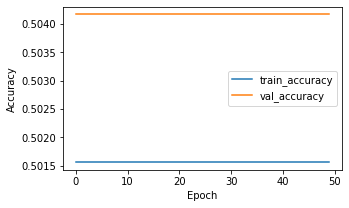

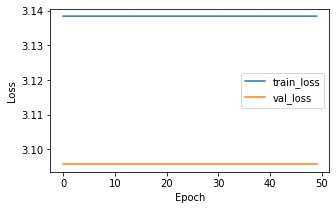

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))

# Plot the the training loss
plt.plot(result.history["accuracy"], label="train_accuracy")

# Plot the the validation loss
plt.plot(result.history["val_accuracy"], label="val_accuracy")


# Name the x and y axises
plt.ylabel("Accuracy") 
plt.xlabel("Epoch")


# Put legend table
plt.legend()

# Show the plot
plt.show()

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))

# Plot the the training loss
plt.plot(result.history["loss"], label="train_loss")

# Plot the the validation loss
plt.plot(result.history["val_loss"], label="val_loss")


# Name the x and y axises
plt.ylabel("Loss") 
plt.xlabel("Epoch")


# Put legend table
plt.legend()

# Show the plot
plt.show()

19/19 [==============================] - 6s 39ms/step
              precision    recall  f1-score   support

    Tümörsüz       0.54      1.00      0.70       321
     Tümörlü       0.92      0.04      0.08       279

    accuracy                           0.55       600
   macro avg       0.73      0.52      0.39       600
weighted avg       0.72      0.55      0.41       600





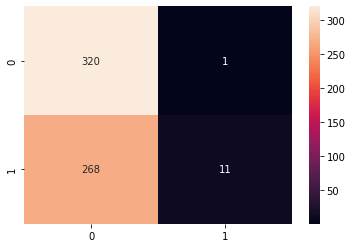

In [13]:
prediction1 = model.predict(X_test)
prediction = np.argmax(prediction1,axis=1)

from sklearn.metrics import classification_report


rapor = classification_report(y_test,prediction,target_names = ["Tümörsüz","Tümörlü"])

print(rapor)

print()
print()

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, prediction)
f = sns.heatmap(cm, annot=True,fmt='d')


# K-fold uygulaması

In [9]:
def define_model():
  model_kfold = InceptionResNetV2(weights ="imagenet", include_top = False ,pooling='avg')
  predictions = Dense(2, activation = 'sigmoid')(model_kfold.output)
  model_kfold = Model(inputs = model_kfold.input, outputs = predictions)

  for layer in model_kfold.layers:
    layer.trainable = False

  optimizer = Adam(lr = 0.001)
  model.compile(optimizer= optimizer,
              loss= "sparse_categorical_crossentropy",
              metrics=['accuracy'])  
  return model

In [10]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

model_k = KerasClassifier(build_fn= define_model,epochs =50 ,batch_size=64,verbose=2 )
scores = cross_val_score(model_k,X_train,y_train,cv=3,scoring="accuracy")

<ipython-input-10-e7f87a17a35a>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_k = KerasClassifier(build_fn= define_model,epochs =50 ,batch_size=64,verbose=2 )
/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
25/25 - 12s - loss: 3.1368 - accuracy: 0.4975 - 12s/epoch - 484ms/step
Epoch 2/50
25/25 - 1s - loss: 3.1368 - accuracy: 0.4975 - 1s/epoch - 50ms/step
Epoch 3/50
25/25 - 1s - loss: 3.1368 - accuracy: 0.4975 - 1s/epoch - 51ms/step
Epoch 4/50
25/25 - 1s - loss: 3.1368 - accuracy: 0.4975 - 1s/epoch - 53ms/step
Epoch 5/50
25/25 - 1s - loss: 3.1368 - accuracy: 0.4975 - 1s/epoch - 53ms/step
Epoch 6/50
25/25 - 1s - loss: 3.1368 - accuracy: 0.4975 - 1s/epoch - 53ms/step
Epoch 7/50
25/25 - 1s - loss: 3.1368 - accuracy: 0.4975 - 1s/epoch - 51ms/step
Epoch 8/50
25/25 - 1s - loss: 3.1368 - accuracy: 0.4975 - 1s/epoch - 51ms/step
Epoch 9/50
25/25 - 1s - loss: 3.1368 - accuracy: 0.4975 - 1s/epoch - 50ms/step
Epoch 10/50
25/25 - 1s - loss: 3.1368 - accuracy: 0.4975 - 1s/epoch - 51ms/step
Epoch 11/50
25/25 - 1s - loss: 3.1368 - accuracy: 0.4975 - 1s/epoch - 52ms/step
Epoch 12/50
25/25 - 1s - loss: 3.1368 - accuracy: 0.4975 - 1s/epoch - 51ms/step
Epoch 13/50
25/25 - 1s - loss: 3.1368 - accura

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 - 11s - loss: 3.1289 - accuracy: 0.5069 - 11s/epoch - 447ms/step
Epoch 2/50
25/25 - 1s - loss: 3.1289 - accuracy: 0.5069 - 1s/epoch - 52ms/step
Epoch 3/50
25/25 - 1s - loss: 3.1289 - accuracy: 0.5069 - 1s/epoch - 51ms/step
Epoch 4/50
25/25 - 1s - loss: 3.1289 - accuracy: 0.5069 - 1s/epoch - 51ms/step
Epoch 5/50
25/25 - 1s - loss: 3.1289 - accuracy: 0.5069 - 1s/epoch - 51ms/step
Epoch 6/50
25/25 - 1s - loss: 3.1289 - accuracy: 0.5069 - 1s/epoch - 52ms/step
Epoch 7/50
25/25 - 1s - loss: 3.1289 - accuracy: 0.5069 - 1s/epoch - 51ms/step
Epoch 8/50
25/25 - 1s - loss: 3.1289 - accuracy: 0.5069 - 1s/epoch - 51ms/step
Epoch 9/50
25/25 - 1s - loss: 3.1289 - accuracy: 0.5069 - 1s/epoch - 51ms/step
Epoch 10/50
25/25 - 1s - loss: 3.1289 - accuracy: 0.5069 - 1s/epoch - 53ms/step
Epoch 11/50
25/25 - 1s - loss: 3.1289 - accuracy: 0.5069 - 1s/epoch - 54ms/step
Epoch 12/50
25/25 - 1s - loss: 3.1289 - accuracy: 0.5069 - 1s/epoch - 54ms/step
Epoch 13/50
25/25 - 1s - loss: 3.1289 - accuracy: 0.5069 

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 - 12s - loss: 3.1239 - accuracy: 0.5019 - 12s/epoch - 466ms/step
Epoch 2/50
25/25 - 1s - loss: 3.1239 - accuracy: 0.5019 - 1s/epoch - 51ms/step
Epoch 3/50
25/25 - 1s - loss: 3.1239 - accuracy: 0.5019 - 1s/epoch - 51ms/step
Epoch 4/50
25/25 - 1s - loss: 3.1239 - accuracy: 0.5019 - 1s/epoch - 51ms/step
Epoch 5/50
25/25 - 1s - loss: 3.1239 - accuracy: 0.5019 - 1s/epoch - 52ms/step
Epoch 6/50
25/25 - 1s - loss: 3.1239 - accuracy: 0.5019 - 1s/epoch - 54ms/step
Epoch 7/50
25/25 - 1s - loss: 3.1239 - accuracy: 0.5019 - 1s/epoch - 53ms/step
Epoch 8/50
25/25 - 1s - loss: 3.1239 - accuracy: 0.5019 - 1s/epoch - 53ms/step
Epoch 9/50
25/25 - 1s - loss: 3.1239 - accuracy: 0.5019 - 1s/epoch - 52ms/step
Epoch 10/50
25/25 - 1s - loss: 3.1239 - accuracy: 0.5019 - 1s/epoch - 51ms/step
Epoch 11/50
25/25 - 1s - loss: 3.1239 - accuracy: 0.5019 - 1s/epoch - 51ms/step
Epoch 12/50
25/25 - 1s - loss: 3.1239 - accuracy: 0.5019 - 1s/epoch - 51ms/step
Epoch 13/50
25/25 - 1s - loss: 3.1239 - accuracy: 0.5019 

In [11]:
print(f"1-Fold: {scores[0]}")
print(f"2-Fold: {scores[1]}")
print(f"3-Fold: {scores[2]}")
print()
print(f"ortalama accuracy değeri : {scores.mean()}")

1-Fold: 0.51125
2-Fold: 0.4925
3-Fold: 0.5025

ortalama accuracy değeri : 0.5020833333333333
